# Optimization Techniques on MNIST Dataset
This notebook explores various optimization techniques for training neural networks on the MNIST dataset. The focus will be on different optimization strategies including Adaptive Learning Rates, SGD, Mini-Batch Gradient Descent, and Learning Rate Adjustments. Each section will provide a practical task related to these techniques.

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [3]:
# reshape X so it is flat vector instead of matrix
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

## Adaptive Learning Rates

## Implementing a Simple Neural Network from Scratch

### Building the Network
Define the architecture of a simple feedforward neural network with one hidden layer. You will need to manually initialize the weights and biases.

**TODO:** Initialize Parameters
Objective: Create a function to initialize weights and biases for all layers of the network.
Instructions:
- Initialize weights with small random values and biases with zeros.
- Use numpy for creating arrays and operations.

Hint: Use np.random.randn for weights and np.zeros for biases. Scale weights by 0.1.

In [4]:
def initialize_parameters(input_size, hidden_size, output_size):
    """
    Initialize weights and biases for a simple feedforward neural network.

    Parameters:
    - input_size: Number of input features.
    - hidden_size: Number of neurons in the hidden layer.
    - output_size: Number of output classes.

    Returns:
    - parameters: A dictionary containing weights and biases.
    """
    params = {}
    params['W1'] = np.random.randn(input_size, hidden_size) * 0.1
    params['b1'] = np.zeros(hidden_size)
    params['W2'] = np.random.randn(hidden_size, output_size) * 0.1
    params['b2'] = np.zeros(output_size)
    return params




TODO: Define Activation Functions
Objective: Implement commonly used activation functions.
Instructions:
 - Define the ReLU and Sigmoid activation functions.
 - Ensure each function works with numpy arrays and supports both forward and derivative (gradient) computations.


In [5]:
def relu(x):
    """
    ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying ReLU.
    """
    return np.maximum(0, x)

def relu_derivative(x):
    """
    Derivative of ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of ReLU.
    """
    return np.where(x > 0, 1, 0)

def softmax(x):
    """
    Softmax activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying softmax.
    """
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def sigmoid(x):
    """
    Sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying sigmoid.
    """
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """
    Derivative of sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of sigmoid.
    """
    return sigmoid(x) * (1 - sigmoid(x))


TODO: Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.

In [6]:
def forward_propagation(X, parameters):
    """
    Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.
    """
    cache = {}

    cache['Z1'] = X @ parameters['W1'] + parameters['b1']
    cache['A1'] = relu(cache['Z1'])
    cache['Z2'] = cache['A1'] @ parameters['W2'] + parameters['b2']
    cache['A2'] = softmax(cache['Z2']) # I use softmax here because I am using cross-entropy loss for multi-class classification

    return cache['A2'], cache


TODO: Implement the loss function. Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.

In [7]:
def compute_loss(y_true, y_pred):
    """
    Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.
    """
    return np.mean(-np.sum(y_true * np.log(y_pred + 1e-8), axis=1), axis=0)

TODO: Implement backpropagation for the network and Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.

In [8]:
def backward_propagation(X, y_true, parameters, cache):
    """
    Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.
    """
    gradients = {}

    dZ2 = (cache['A2'] - y_true) / X.shape[0]
    gradients['dW2'] = cache['A1'].T @ dZ2
    gradients['db2'] = np.sum(dZ2, axis=0)

    dA1 = dZ2 @ parameters['W2'].T
    dZ1 = dA1 * relu_derivative(cache['Z1'])
    gradients['dW1'] = X.T @ dZ1
    gradients['db1'] = np.sum(dZ1, axis=0)

    return gradients


TODO: Update the parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.

In [9]:
def update_parameters(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    parameters['W1'] -= learning_rate * gradients['dW1']
    parameters['b1'] -= learning_rate * gradients['db1']
    parameters['W2'] -= learning_rate * gradients['dW2']
    parameters['b2'] -= learning_rate * gradients['db2']

    return parameters

TODO: Train the model by changing the hidden layer size (such as [32, 64, 128]) and observe the impact on network performance during training.

    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

In [10]:
# Training Loop
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)

    for epoch in range(1, epochs+1):
        y_pred, cache = forward_propagation(X_train, parameters)

        loss = compute_loss(y_train, y_pred)

        gradients = backward_propagation(X_train, y_train, parameters, cache)

        parameters = update_parameters(parameters, gradients, learning_rate)

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss:.3f}')

    return parameters

hidden_sizes = [32, 64, 128]

for hidden_size in hidden_sizes:
    print(f'\nTraining model with hidden size: {hidden_size}')
    trained_params = train_model(x_train, y_train, hidden_size, epochs=50, learning_rate=0.01)


Training model with hidden size: 32
Epoch 10, Loss: 2.305
Epoch 20, Loss: 2.241
Epoch 30, Loss: 2.191
Epoch 40, Loss: 2.147
Epoch 50, Loss: 2.106

Training model with hidden size: 64
Epoch 10, Loss: 2.356
Epoch 20, Loss: 2.213
Epoch 30, Loss: 2.108
Epoch 40, Loss: 2.021
Epoch 50, Loss: 1.943

Training model with hidden size: 128
Epoch 10, Loss: 2.152
Epoch 20, Loss: 1.926
Epoch 30, Loss: 1.774
Epoch 40, Loss: 1.652
Epoch 50, Loss: 1.551


TODO: Implement Adam Optimizer

1. Initialize Parameters: Create variables to store the moment estimates (first and second) for each parameter.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).

2. Update Rules: Implement the update rules based on the gradients, learning rate, and moment estimates.


In [11]:
def initialize_adam(parameters):
    """
    Initialize the Adam optimizer variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).
    """
    v = {}
    s = {}

    for key, value in parameters.items():
        v[key] = np.zeros_like(value)
        s[key] = np.zeros_like(value)

    t = 0

    return v, s, t


def update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Update parameters using the Adam optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: First moment vector.
    - s: Second moment vector.
    - t: Time step.
    - learning_rate: Learning rate for updates.
    - beta1: Exponential decay rate for the first moment estimates.
    - beta2: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated first moment vector.
    - s: Updated second moment vector.
    - t: Updated time step.
    """

    t += 1

    for key in parameters.keys():
        v[key] = beta1 * v[key] + (1 - beta1) * gradients[f'd{key}']
        s[key] = beta2 * s[key] + (1 - beta2) * gradients[f'd{key}']**2

        v_bar = v[key] / (1 - beta1**t)
        s_bar = s[key] / (1 - beta2**t)

        parameters[key] -= learning_rate * v_bar / (np.sqrt(s_bar) + epsilon)

    return parameters, v, s, t


TODO: Implement Adam optimizer into the training loop.

In [12]:
def train_model_with_adam(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001):
    """
    Train the neural network model using Adam optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)
    v, s, t = initialize_adam(parameters)

    for epoch in range(1, epochs+1):
        y_pred, cache = forward_propagation(X_train, parameters)

        loss = compute_loss(y_train, y_pred)

        gradients = backward_propagation(X_train, y_train, parameters, cache)

        parameters, v, s, t = update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate)

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss:.3f}')

    return parameters

for hidden_size in hidden_sizes:
    print(f'\nTraining model with hidden size: {hidden_size}')
    trained_params = train_model_with_adam(x_train, y_train, hidden_size, epochs=50, learning_rate=0.001)


Training model with hidden size: 32
Epoch 10, Loss: 1.903
Epoch 20, Loss: 1.498
Epoch 30, Loss: 1.191
Epoch 40, Loss: 0.993
Epoch 50, Loss: 0.873

Training model with hidden size: 64
Epoch 10, Loss: 1.415
Epoch 20, Loss: 0.982
Epoch 30, Loss: 0.803
Epoch 40, Loss: 0.709
Epoch 50, Loss: 0.648

Training model with hidden size: 128
Epoch 10, Loss: 1.449
Epoch 20, Loss: 0.928
Epoch 30, Loss: 0.750
Epoch 40, Loss: 0.657
Epoch 50, Loss: 0.595


### Compare Adam and RMSprop


TODO: First, implement the RMSprop optimizer. The RMSprop optimizer uses a moving average of squared gradients to normalize the gradient, which helps to stabilize the updates.

In [13]:
def initialize_rmsprop(parameters):
    """
    Initialize the RMSprop variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - s: Second moment vector (initialized to zeros).
    """
    s = {}
    for key, value in parameters.items():
        s[key] = np.zeros_like(value)

    return s

def update_parameters_with_rmsprop(parameters, gradients, s, learning_rate=0.001, beta=0.9, epsilon=1e-8):
    """
    Update parameters using the RMSprop optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - s: Second moment vector.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - s: Updated second moment vector.
    """
    for key in parameters.keys():
        s[key] = beta * s[key] + (1 - beta) * gradients[f'd{key}']**2
        parameters[key] -= learning_rate * gradients[f'd{key}'] / (np.sqrt(s[key]) + epsilon)

    return parameters, s


TODO: Modify the training loop to allow for both optimizers and store the loss history for comparison.

In [14]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001, optimizer='adam'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('adam' or 'rmsprop').

    Returns:
    - loss_history: List of loss values over epochs.
    """

    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)

    if optimizer == 'adam':
        v, s, t = initialize_adam(parameters)
    elif optimizer == 'rmsprop':
        s = initialize_rmsprop(parameters)

    loss_history = []

    for epoch in range(1, epochs+1):
        y_pred, cache = forward_propagation(X_train, parameters)

        loss = compute_loss(y_train, y_pred)
        loss_history.append(loss)

        gradients = backward_propagation(X_train, y_train, parameters, cache)

        if optimizer == 'adam':
            parameters, v, s, t = update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate)
        elif optimizer == 'rmsprop':
            parameters, s = update_parameters_with_rmsprop(parameters, gradients, s, learning_rate)

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss:.3f}')

    return loss_history


TODO:  Compare Both Optimizers. Create a function to train the model using both optimizers and plot the loss histories for comparison.

Epoch 10, Loss: 1.327
Epoch 20, Loss: 0.864
Epoch 30, Loss: 0.713
Epoch 40, Loss: 0.632
Epoch 50, Loss: 0.578
Epoch 10, Loss: 1.118
Epoch 20, Loss: 0.863
Epoch 30, Loss: 0.756
Epoch 40, Loss: 0.697
Epoch 50, Loss: 0.663


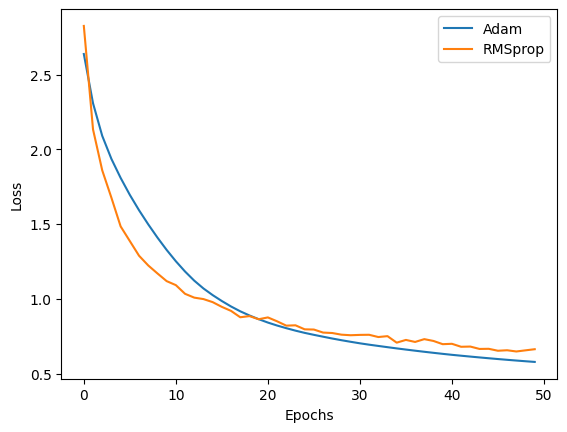

In [15]:
def compare_optimizers(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the Adam and RMSprop optimizers.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    adam_loss = train_model(X_train, y_train, hidden_size, epochs, optimizer='adam')
    rmsprop_loss = train_model(X_train, y_train, hidden_size, epochs, optimizer='rmsprop')

    plt.plot(adam_loss, label='Adam')
    plt.plot(rmsprop_loss, label='RMSprop')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

compare_optimizers(x_train, y_train, hidden_size=128, epochs=50)

## Stochastic Gradient Descent (SGD)

### Impact of Different Learning Rates on SGD


Explore the impact of different learning rates on the training dynamics and performance of Stochastic Gradient Descent (SGD). This will allow us to observe how the learning rate affects convergence speed, stability, and final performance.

Steps for Implementing the Experiment

1. Define the SGD Optimizer: Implement a simple SGD optimizer.
2. Modify the Training Loop: Allow for different learning rates.
3. Train the Model: Run the training process with a set of predefined learning rates.
4. Visualize the Results: Plot the loss curves for each learning rate to compare their effects

1. Implement SGD Optimizer


In [16]:
def update_parameters_with_sgd(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using Stochastic Gradient Descent (SGD).

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    for key in parameters.keys():
        parameters[key] -= learning_rate * gradients[f'd{key}']

    return parameters

2. Modify the Training Loop


In [17]:
def train_model_with_sgd(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using SGD optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)

    loss_history = []

    for epoch in range(1, epochs+1):
        epoch_loss = 0
        iter_count = X_train.shape[0] // 100
        for _ in range(iter_count):
            index = np.random.choice(X_train.shape[0])

            x = X_train[index].reshape(1, -1)
            y = y_train[index].reshape(1, -1)

            y_pred, cache = forward_propagation(x, parameters)
            loss = compute_loss(y, y_pred)
            epoch_loss += loss

            gradients = backward_propagation(x, y, parameters, cache)
            parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)

        epoch_loss /= iter_count

        loss_history.append(epoch_loss)

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {epoch_loss:.3f}')

    return loss_history

3. Experiment with Different Learning Rates



Training model with learning rate: 0.001
Epoch 10, Loss: 0.778
Epoch 20, Loss: 0.600
Epoch 30, Loss: 0.613
Epoch 40, Loss: 0.529
Epoch 50, Loss: 0.539

Training model with learning rate: 0.01
Epoch 10, Loss: 0.590
Epoch 20, Loss: 0.513
Epoch 30, Loss: 0.561
Epoch 40, Loss: 0.528
Epoch 50, Loss: 0.478

Training model with learning rate: 0.1
Epoch 10, Loss: 1.925
Epoch 20, Loss: 1.898
Epoch 30, Loss: 1.888
Epoch 40, Loss: 2.109
Epoch 50, Loss: 2.115


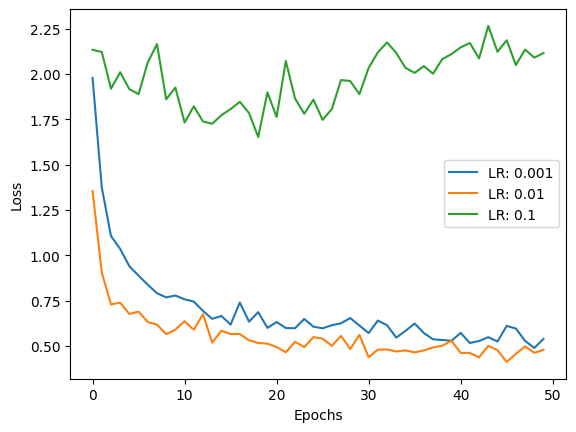

In [18]:
def compare_learning_rates(X_train, y_train, hidden_size, epochs=50, learning_rates=[0.001, 0.01, 0.1]):
    """
    Compare the performance of SGD with different learning rates.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rates: List of learning rates to test.
    """
    for lr in learning_rates:
        print(f'\nTraining model with learning rate: {lr}')
        loss = train_model_with_sgd(X_train, y_train, hidden_size, epochs, learning_rate=lr)
        plt.plot(loss, label=f'LR: {lr}')

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

learning_rates_to_compare = [0.001, 0.01, 0.1]
compare_learning_rates(x_train, y_train, hidden_size=128, epochs=50, learning_rates=learning_rates_to_compare)

### SGD with Momentum vs. Classic SGD


TODO: Compare Stochastic Gradient Descent (SGD) with momentum and classic SGD, you can set up an experiment that trains the same model using both methods. This will help you observe differences in convergence speed and stability.

Steps for Implementing the Comparison:

1. Implement Classic SGD: Ensure you have a basic SGD implementation.(already implemented in the previous cells)

2. Implement SGD with Momentum: Add a momentum version of the SGD optimizer.

3. Modify the Training Loop: Allow for both optimizers in the training process.

4. Train the Model: Run the training process using both optimizers.

5. Visualize the Results: Plot the loss curves for each optimizer to compare their performance.

2. Implement SGD with Momentum


In [19]:
def initialize_momentum(parameters):
    """
    Initialize the momentum variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: Momentum variable (initialized to zeros).
    """
    v = {}
    for key, value in parameters.items():
        v[key] = np.zeros_like(value)

    return v

def update_parameters_with_momentum(parameters, gradients, v, learning_rate=0.01, beta=0.9):
    """
    Update parameters using SGD with momentum.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: Momentum variable.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for momentum.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated momentum variable.
    """
    for key in parameters.keys():
        v[key] = beta * v[key] + (1 - beta) * gradients[f'd{key}']
        parameters[key] -= learning_rate * v[key]

    return parameters, v

3. Modify the Training Loop


In [20]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, optimizer='sgd'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('sgd' or 'momentum').

    Returns:
    - loss_history: List of loss values over epochs.
    """

    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)

    if optimizer == 'momentum':
        v = initialize_momentum(parameters)

    loss_history = []

    for epoch in range(1, epochs+1):
        epoch_loss = 0
        iter_count = X_train.shape[0] // 20
        for _ in range(iter_count):
            index = np.random.choice(X_train.shape[0])

            x = X_train[index].reshape(1, -1)
            y = y_train[index].reshape(1, -1)

            y_pred, cache = forward_propagation(x, parameters)
            loss = compute_loss(y, y_pred)
            epoch_loss += loss

            gradients = backward_propagation(x, y, parameters, cache)

            if optimizer == 'momentum':
                parameters, v = update_parameters_with_momentum(parameters, gradients, v, learning_rate)
            else:
                parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)

        epoch_loss /= iter_count

        loss_history.append(epoch_loss)

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {epoch_loss:.3f}')

    return loss_history

4. Train the Model with Both Optimizers


Training with SGD
Epoch 10, Loss: 0.478
Epoch 20, Loss: 0.408
Epoch 30, Loss: 0.389
Epoch 40, Loss: 0.373
Epoch 50, Loss: 0.370

Training with Momentum
Epoch 10, Loss: 0.478
Epoch 20, Loss: 0.405
Epoch 30, Loss: 0.396
Epoch 40, Loss: 0.379
Epoch 50, Loss: 0.351


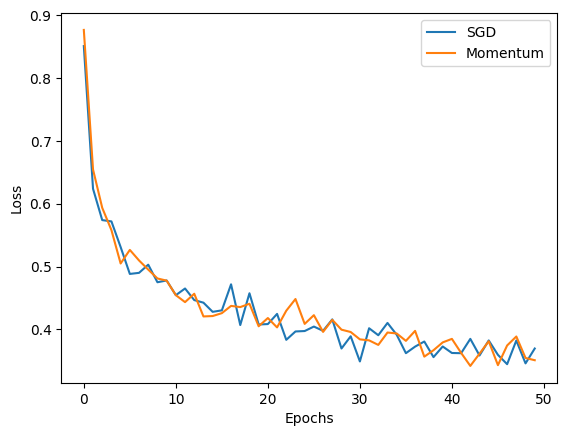

In [21]:
def compare_sgd_and_momentum(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the performance of classic SGD and SGD with momentum.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    print('Training with SGD')
    sgd_loss = train_model(X_train=X_train, y_train=y_train, hidden_size=hidden_size, epochs=epochs, optimizer='sgd')

    print('\nTraining with Momentum')
    momentum_loss = train_model(X_train=X_train, y_train=y_train, hidden_size=hidden_size, epochs=epochs, optimizer='momentum')

    plt.plot(sgd_loss, label='SGD')
    plt.plot(momentum_loss, label='Momentum')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

compare_sgd_and_momentum(x_train, y_train, hidden_size=128, epochs=50)

## Mini-Batch Gradient Descent

### Mini-Batch Size Optimization

TODO: Investigate how different mini-batch sizes affect model performance, you can set up an experiment where you train the same model using various mini-batch sizes.

Steps for Implementing the Mini-Batch Size Experiment

1. Modify the Training Loop: Update the training loop to use mini-batches.
2. Train the Model: Run the training process with a set of predefined mini-batch sizes.
3. Evaluate Performance: Track training time and accuracy for each mini-batch size.
4. Print the training losses and accuracies for comparison.

1. Modify the Training Loop for Mini-Batches


In [22]:
def accuracy(y_true, y_pred):
    """
    Compute the accuracy of the model.

    Parameters:
    - y_true: True labels.
    - y_pred: Predicted labels.

    Returns:
    - acc: Accuracy value.
    """
    return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))

In [23]:
def train_model_with_mini_batches(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, batch_size=32):
    """
    Train the neural network model using mini-batches.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - batch_size: Size of mini-batches.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)

    loss_history = []
    accuracy_history = []

    v = initialize_momentum(parameters)

    for epoch in range(1, epochs+1):
        epoch_loss = 0

        iterations = X_train.shape[0] // batch_size

        for i in range(iterations):
            start = i * batch_size
            end = min(start + batch_size, X_train.shape[0])

            x = X_train[start:end].reshape(-1, input_size)
            y = y_train[start:end].reshape(-1, output_size)

            y_pred, cache = forward_propagation(x, parameters)
            loss = compute_loss(y, y_pred)
            epoch_loss += loss

            gradients = backward_propagation(x, y, parameters, cache)
            parameters, v = update_parameters_with_momentum(parameters, gradients, v, learning_rate)

        epoch_loss /= iterations
        loss_history.append(epoch_loss)

        y_pred, _ = forward_propagation(X_train, parameters)
        batch_accuracy = accuracy(y_train, y_pred)
        accuracy_history.append(batch_accuracy)

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {epoch_loss:.3f}, Accuracy: {batch_accuracy:.3f}')

    return loss_history, accuracy_history


2. Train the Model with Different Mini-Batch Sizes



Training model with batch size: 16
Epoch 10, Loss: 0.335, Accuracy: 0.881
Epoch 20, Loss: 0.280, Accuracy: 0.899
Epoch 30, Loss: 0.245, Accuracy: 0.911
Epoch 40, Loss: 0.218, Accuracy: 0.920
Epoch 50, Loss: 0.196, Accuracy: 0.926

Training model with batch size: 32
Epoch 10, Loss: 0.378, Accuracy: 0.869
Epoch 20, Loss: 0.327, Accuracy: 0.884
Epoch 30, Loss: 0.296, Accuracy: 0.894
Epoch 40, Loss: 0.272, Accuracy: 0.900
Epoch 50, Loss: 0.251, Accuracy: 0.907

Training model with batch size: 64
Epoch 10, Loss: 0.424, Accuracy: 0.855
Epoch 20, Loss: 0.373, Accuracy: 0.870
Epoch 30, Loss: 0.343, Accuracy: 0.880
Epoch 40, Loss: 0.321, Accuracy: 0.887
Epoch 50, Loss: 0.303, Accuracy: 0.893


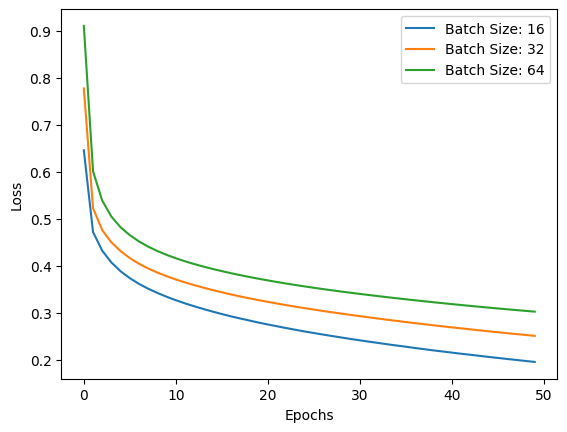

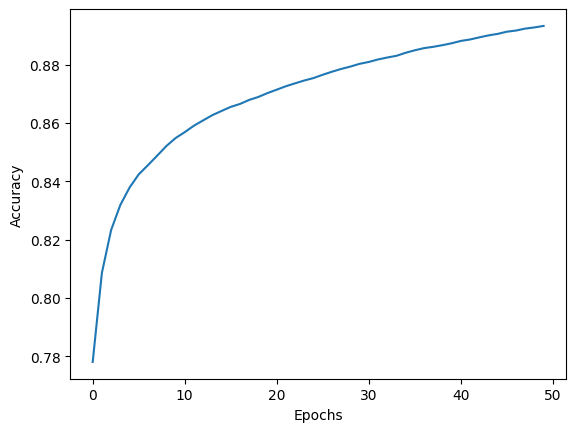

In [24]:
def compare_mini_batch_sizes(X_train, y_train, hidden_size, epochs=50, batch_sizes=[16, 32, 64]):
    """
    Compare the performance of different mini-batch sizes and print results.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_sizes: List of mini-batch sizes to test.
    """
    for batch_size in batch_sizes:
        print(f'\nTraining model with batch size: {batch_size}')
        loss, accuracy = train_model_with_mini_batches(X_train, y_train, hidden_size, epochs, batch_size=batch_size)
        plt.plot(loss, label=f'Batch Size: {batch_size}')

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(accuracy)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

compare_mini_batch_sizes(x_train, y_train, hidden_size=128, epochs=50, batch_sizes=[16, 32, 64])

### Mini-Batch vs. Full-Batch Gradient Descent


TODO: Compare the efficiency and performance of mini-batch gradient descent against full-batch gradient descent.

1. Implement Full-Batch Gradient Descent: Ensure you have a full-batch gradient descent implementation.

2. Modify the Training Loop: Allow the training loop to handle both mini-batch and full-batch scenarios.

3. Train the Model: Run the training process using both methods and track their performance.

4. Print Results: Display the final loss and accuracy for both methods along with training times.

In [1]:
def train_model_full_batch(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)

    loss_history = []
    accuracy_history = []

    v = initialize_momentum(parameters)

    for epoch in range(1, epochs+1):
        y_pred, cache = forward_propagation(X_train, parameters)

        loss = compute_loss(y_train, y_pred)
        loss_history.append(loss)

        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters, v = update_parameters_with_momentum(parameters, gradients, v, learning_rate)

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss:.3f}')

        accuracy_history.append(accuracy(y_train, y_pred))

    return loss_history, accuracy_history


Training with Full-Batch
Epoch 10, Loss: 2.605
Epoch 20, Loss: 2.188
Epoch 30, Loss: 1.973
Epoch 40, Loss: 1.807
Epoch 50, Loss: 1.668
Training with Mini-Batches
Epoch 10, Loss: 0.382, Accuracy: 0.869
Epoch 20, Loss: 0.330, Accuracy: 0.885
Epoch 30, Loss: 0.298, Accuracy: 0.895
Epoch 40, Loss: 0.274, Accuracy: 0.903
Epoch 50, Loss: 0.254, Accuracy: 0.909


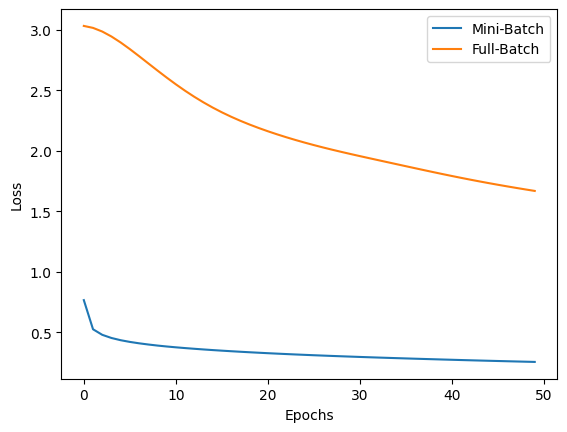

Mini-Batch Final Loss: 0.254, Accuracy: 0.909
Full-Batch Final Loss: 1.668, Accuracy: 0.505


In [25]:
def compare_mini_batch_and_full_batch(X_train, y_train, hidden_size, epochs=50, batch_size=32):
    """
    Compare the performance of mini-batch gradient descent against full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_size: Size of mini-batches for mini-batch gradient descent.
    """
    print('\nTraining with Full-Batch')
    full_batch_loss, full_batch_accuracy = train_model_full_batch(X_train, y_train, hidden_size, epochs)

    print('Training with Mini-Batches')
    mini_batch_loss, mini_batch_accuracy = train_model_with_mini_batches(X_train, y_train, hidden_size, epochs, batch_size=batch_size)


    plt.plot(mini_batch_loss, label='Mini-Batch')
    plt.plot(full_batch_loss, label='Full-Batch')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    print(f'Mini-Batch Final Loss: {mini_batch_loss[-1]:.3f}, Accuracy: {mini_batch_accuracy[-1]:.3f}')
    print(f'Full-Batch Final Loss: {full_batch_loss[-1]:.3f}, Accuracy: {full_batch_accuracy[-1]:.3f}')

compare_mini_batch_and_full_batch(x_train, y_train, hidden_size=128)